# Beginners guide to the three types of machine learning

https://towardsdatascience.com/beginners-guide-to-the-three-types-of-machine-learning-3141730ef45d

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['TARGET'] = pd.Series(wine.target)

In [4]:
X_w = wine_df.drop(['TARGET'], axis=1)
y_w = wine_df['TARGET']
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2)

In [13]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    model = classifier
    model.fit(X_train_w, y_train_w)  
    y_pred_w = model.predict(X_test_w)
    print(classifier)
    print("model score: %.3f" % f1_score(y_test_w, y_pred_w, average='weighted'))

KNeighborsClassifier(n_neighbors=3)
model score: 0.710
SVC(C=0.025, probability=True)
model score: 0.524
NuSVC(probability=True)
model score: 0.811
DecisionTreeClassifier()
model score: 0.973
RandomForestClassifier()
model score: 1.000
AdaBoostClassifier()
model score: 0.944
GradientBoostingClassifier()
model score: 0.972


# Regression

In [14]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = pd.Series(boston.target)
X_b = boston_df.drop(['TARGET'], axis=1)
y_b = boston_df['TARGET']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2)

In [15]:
regressors = [
    linear_model.Lasso(alpha=0.1),
    linear_model.LinearRegression(),
    ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0),
    SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False),
    linear_model.Ridge(alpha=.5)                
    ]
for regressor in regressors:
    model = regressor
    model.fit(X_train_b, y_train_b)  
    y_pred_b = model.predict(X_test_b)
    print(regressor)
    print("mean squared error: %.3f" % sqrt(mean_squared_error(y_test_b, y_pred_b)))

Lasso(alpha=0.1)
mean squared error: 5.717
LinearRegression()
mean squared error: 5.528
ElasticNetCV(cv=5, random_state=0)
mean squared error: 5.866
SVR(gamma='auto')
mean squared error: 8.983
Ridge(alpha=0.5)
mean squared error: 5.557


# Unsupervised learning

In [16]:
np.random.seed(0)
msk = np.random.rand(len(X_w)) < 0.8
train_w = X_w[msk]
test_w = X_w[~msk]

In [17]:
x = train_w.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled,columns=train_w.columns)

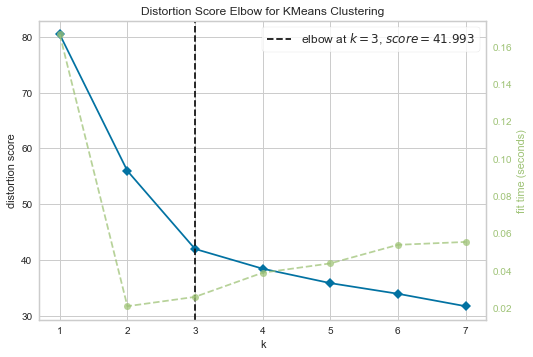

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(X_scaled)       
visualizer.show()

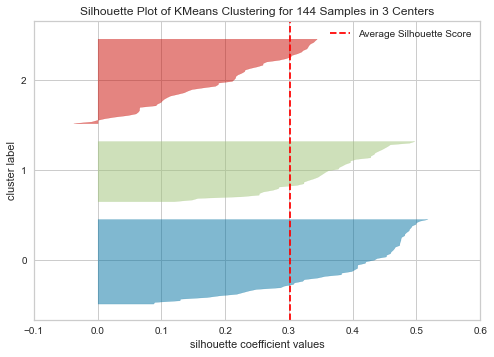

In [23]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled)      
visualizer.show()